# Mobile Price Prediction Using Various Classification Algorithms

#### MOTIVATON
The most difficult challenge many business companies face is to predict the price of a product when they want to introduce a new product to the market or increase the price of their existing products in the market. There are several methods that can be used to predict the price as the one suggested by Symson [1] are cost-based, demand-based, competition-based, and value-based. Since most of the data that can be used in these methods is available online it could be easier to extract them and use machine learning algorithms to predict the price. In this project, we want to predict the price range of mobiles phones which fall under four (4) classes(low cost (0), medium-cost(1), high cost(2), and very high cost(3) ) based on various features of the phone such as RAM, battery power and others features. The nature of this problem is a classification therefore we will use machine learning algorithms such as Random Forest, Naive Bayes, Extreme Gradient Boost(xgboost), Support Vector Machine (SVM), and Decision Tree to predict the price range and evaluate among them on how they accurately predict the price range and choose the best algorithms among them as our final machine learning classifier.

The whole work process is divided in 3 basic steps
    Performing Exploratory Data Analysis (that we will cover in this file)
    Data preprocessing which is covered in (data_preprocessing.ipynb) file
    Model training and validation which is covered in (model_training.ipynb) file

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach of exploring and analyze the different features of the data using visual techniques. By representing data visually which is more readable by human rather than looking the data in a tabular format signifficantly improve's understaning of the datasets in identifying the distribution and patterns in the datasets. EDA is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations and it where we get the basic understanding of the data in hand which helps us in the further process of Data Cleaning and Prepraration. It is recommended to to EDA before building any machine learning model.

However in this file we will not done any data preprocessing work and we will just focus on understanding the fetaures and the correlation among them and among the target variable.

In [45]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)
import warnings
warnings.simplefilter("ignore")
from sklearn.tree import DecisionTreeClassifier

In [47]:
# extra imports
from pandas import read_csv
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from matplotlib.pyplot import figure
from sklearn.ensemble import ExtraTreesClassifier 

## Section 1: Reading the file
Here we are reading the .csv file containing our data and perfoming basic inspection of our datasets such as:

  Checking Total Number of features and understanding the meaning of each features
  
  Checking the data types of those features
  
  Checking if the data contain any missing values
  
  Display the Number of Variables & Number of Observations
  

In [48]:
#load the file
mobile = read_csv("Data/train.csv", header=0, delimiter=',')
mobile.shape

(2000, 21)

Our dataset has 2000 samples and 21 features

In [49]:
#displaying the first 5 rows of our data
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [50]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,...,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,1238.518,0.495,1.522,0.509,4.309,0.521,32.047,0.502,140.249,4.521,...,645.108,1251.515,2124.213,12.306,5.767,11.011,0.761,0.503,0.507,1.500
std,439.418,0.500,0.816,0.500,4.341,0.500,18.146,0.288,35.400,2.288,...,443.781,432.199,1084.732,4.213,4.356,5.464,0.426,0.500,0.500,1.118
min,501.000,0.000,0.500,0.000,0.000,0.000,2.000,0.100,80.000,1.000,...,0.000,500.000,256.000,5.000,0.000,2.000,0.000,0.000,0.000,0.000
25%,851.750,0.000,0.700,0.000,1.000,0.000,16.000,0.200,109.000,3.000,...,282.750,874.750,1207.500,9.000,2.000,6.000,1.000,0.000,0.000,0.750
50%,1226.000,0.000,1.500,1.000,3.000,1.000,32.000,0.500,141.000,4.000,...,564.000,1247.000,2146.500,12.000,5.000,11.000,1.000,1.000,1.000,1.500
75%,1615.250,1.000,2.200,1.000,7.000,1.000,48.000,0.800,170.000,7.000,...,947.250,1633.000,3064.500,16.000,9.000,16.000,1.000,1.000,1.000,2.250
max,1998.000,1.000,3.000,1.000,19.000,1.000,64.000,1.000,200.000,8.000,...,1960.000,1998.000,3998.000,19.000,18.000,20.000,1.000,1.000,1.000,3.000


##### The descriptions of the features in the dataset are as follows

    1. battery_power : Total energy a battery can store in one time measured in mAh
    2. blue : Has bluetooth or not
    3. clock_speed : speed at which microprocessor executes instructions
    4. dual _sim : Has dual sim support or not
    5. fc : Front Camera megapixels
    6. four_g : Has 4G or not
    7. int_memory : Internal Memory in Gigabytes
    8. m_dep : Mobile Depth in cm
    9. mobile_wt : Weight of mobile phone
    10. n_cores : Number of cores of processor
    11. pc : Primary Camera megapixels
    12. px_height : Pixel Resolution Height
    13. px_width : Pixel Resolution Width
    14. ram : Random Access Memory in Megabytes
    15. sc_h : Screen Height of mobile in cm
    16. sc_w : Screen Width of mobile in cm
    17. talk_time : longest time that a single battery charge will last when you are talking
    18. three_g : Has 3G or not
    19. touch_screen : Has touch screen or not
    20. wifi : Has wifi or not
    21. price_range : This is the target variable with values of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



In [51]:
#Checking the unique value of our target variable
mobile.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

##### The values of our target variable
0 (low cost)

1 (medium cost)

2 (high cost) 

3 (very high cost)

In [52]:
#Checking for null values
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Section 2: Data Visualization

In this section we will perform data visualitaion of all the features including categoric and numeeric features,through this process will help us to understanding the distribution of the data sets and relationships between them.

In [53]:
#Divide the features into categorical and continuous
categorical_features=list()
continous_features=list()
for column_name in mobile.columns:
    unique_values = len(mobile[column_name].unique())
    if unique_values < 20:
      categorical_features.append(column_name)
    else:
      continous_features.append(column_name)

##### Assumption:
    
We assume that the categoric features are the one with unique value less than 20

In [54]:
categorical_features

['blue',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

### 2.1 Visualizing Categorical features

<Figure size 1080x1800 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='blue', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='four_g', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='m_dep', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='n_cores', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sc_h', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='sc_w', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='talk_time', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='three_g', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='wifi', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='price_range', ylabel='count'>

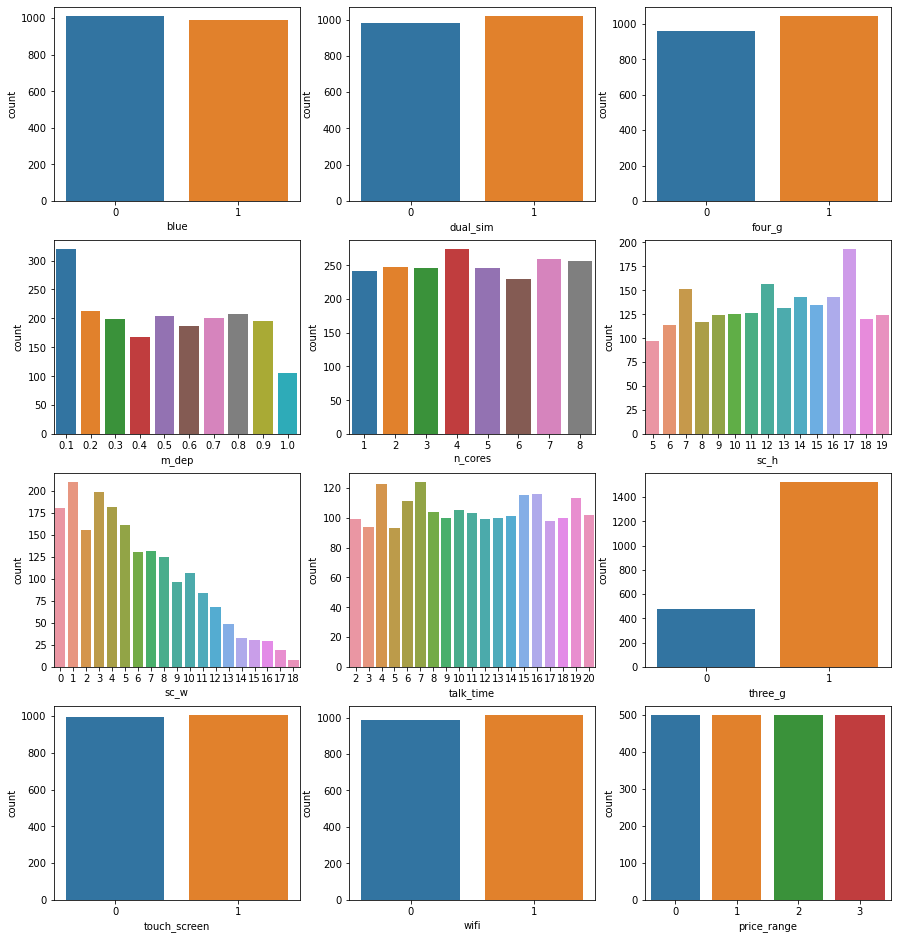

In [55]:
i = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sn.countplot(x = feature , data = mobile)
    i +=1

### 2.2  Visualizing Continous features

<Figure size 1080x1800 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='battery_power', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='fc', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='int_memory', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='mobile_wt', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='pc', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='px_height', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='px_width', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='ram', ylabel='count'>

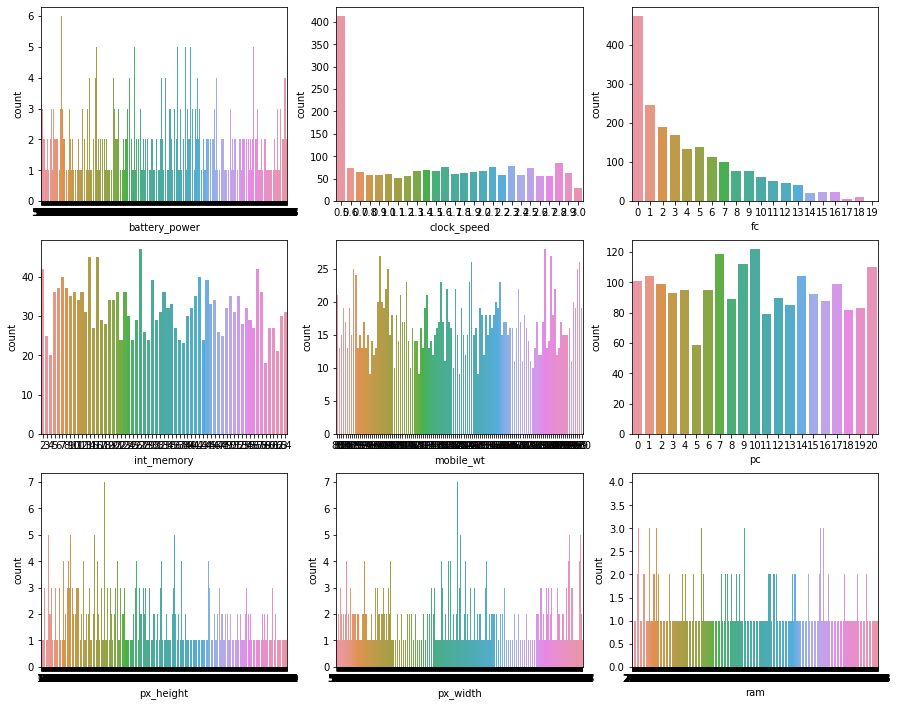

In [38]:
i = 1
plt.figure(figsize = (15,25))
for feature in continous_features:
    plt.subplot(6,3,i)
    sn.countplot(x = feature , data = mobile)
    i +=1
    

### 2.3: Relationship of phone price with some common features

In this section we want to find the relationships of the most common features of the mobile phone and how they impact the price range. It is very important to this because we will know which are important features in building our machine learning model.

#### How does the phone price affected by ram?

The relationship between RAM and price


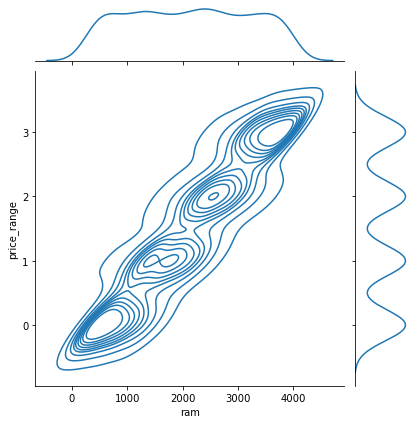

In [31]:
print("The relationship between RAM and price")
sn.jointplot(x='ram',y='price_range',data=mobile,kind='kde');

#### Results
The price of the mobile phone increases as the size of RAM (in MB) increases

#### How does the phone price affected by internal memory?

The relationship between internal memory and price


<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

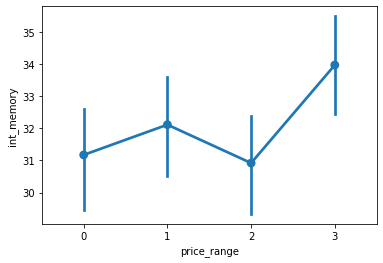

In [32]:
print("The relationship between internal memory and price")
sn.pointplot(y="int_memory", x="price_range", data=mobile)

#### Results
In the price category (0 and 1 and 3) the price increases as the internal memory of the phone increase however in the price category (2) the price range is high while the the internal memory size is not high. We can assume that the price of a phone does not affected by the internal memory of the phone.

#### How does the phone price affected by battery power?

The relationship between battery power and price


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

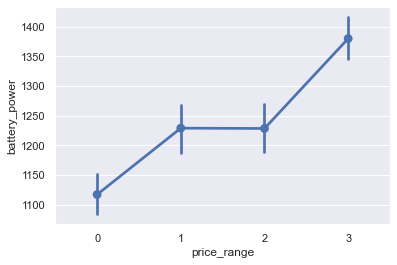

In [19]:
print("The relationship between battery power and price")
sn.pointplot(y="battery_power", x="price_range", data=mobile)

#### Results
The price of the phone increases as the battery power increases from price range 0 to 1 and 2 to 3, however the phone price of the range of 1 and 2 seem to have the same battery power, meaning that the size of battery power in this kind of phone can be same while the price range is different. 

#### How does the phone price affected by mobile weight?

The relationship between mobile weight and price


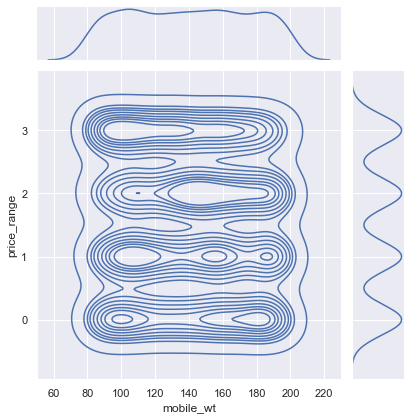

In [20]:
print("The relationship between mobile weight and price")
sn.jointplot(x='mobile_wt',y='price_range',data=mobile,kind='kde');

#### Results
The result show that mobile weight of the phone does not have any impact with the price range

#### How does the phone price affected by talk time?

The relationship between talk time and price


<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

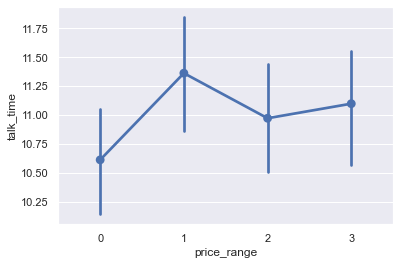

In [21]:
print("The relationship between talk time and price")
sn.pointplot(y="talk_time", x="price_range", data=mobile)

#### How many number of phone have 3G network features?

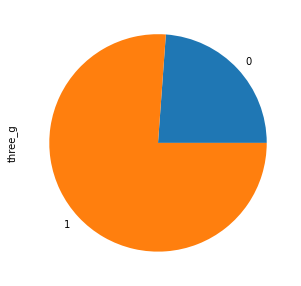

In [44]:
mobile.three_g.value_counts().sort_index().plot.pie(figsize=(6,5));

#### Results
About 75% of the phone has 3G features and only 25% does not have 3G features

#### How does the phone price affected by number of cores of processor?

The relationship between number of cores of processor and price


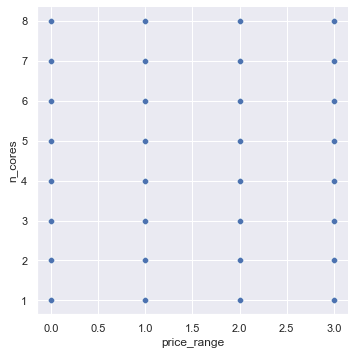

In [22]:
print("The relationship between number of cores of processor and price")
sn.pairplot(mobile , y_vars = 'n_cores' , x_vars = 'price_range' , size = 5)

#### Results
The results show that there is no impact of the number cores of processor to the range of the price, meaning the price range can be high or low with either different or same number of processor core.

#### What is the price range of the phone in relation with 4G and 3G?

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

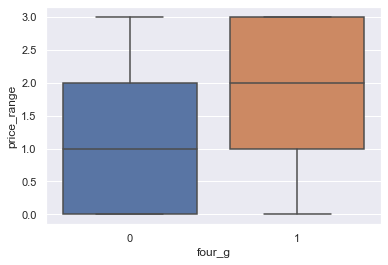

In [23]:
sn.boxplot(data = mobile, x ='four_g',y ='price_range')


<AxesSubplot:xlabel='three_g', ylabel='price_range'>

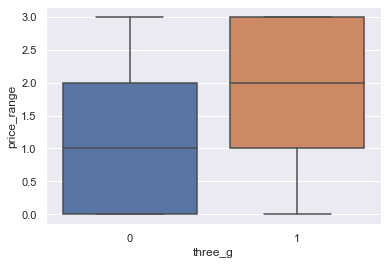

In [24]:
sn.boxplot(data = mobile, x ='three_g',y ='price_range')

#### Results
The phones which support 4G and 3G share the same price range

#### How does the phone price affected by front camera?

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='price_range', ylabel='fc'>

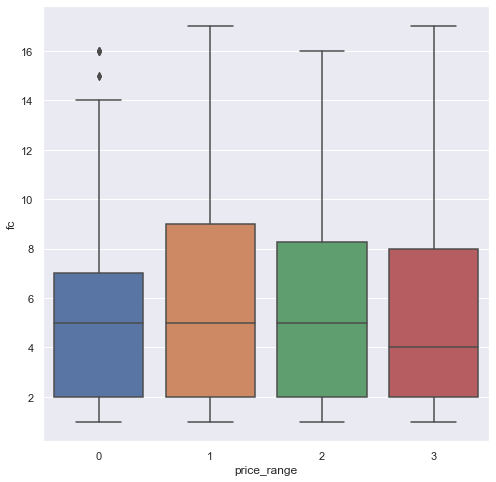

In [25]:
plt.figure(figsize=(8,8))
sn.boxplot(x='price_range', y='fc', data=mobile)

#### How does the phone price affected by pixel height and width of the camera?

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

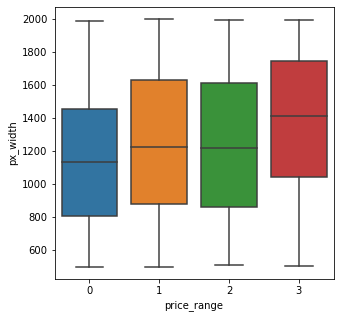

In [40]:
plt.figure(figsize=(5,5))
sn.boxplot(x='price_range', y='px_width', data=mobile)

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

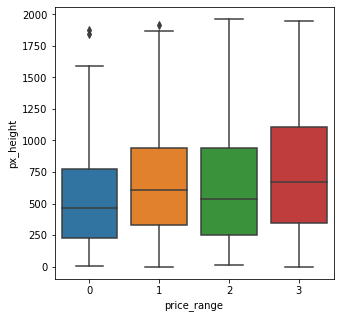

In [39]:
plt.figure(figsize=(5,5))
sn.boxplot(x='price_range', y='px_height', data=mobile)

#### Results
The price range slightly increases with and increase in pixel height and width in all cases however in the price range 2 there is a slightly decreases from range 1 to 2, they seem to share the same px height and width regardless of the increasing the price.

#### The Relationships of Processing power of the CPU with respect to the price range

<AxesSubplot:xlabel='n_cores', ylabel='clock_speed'>

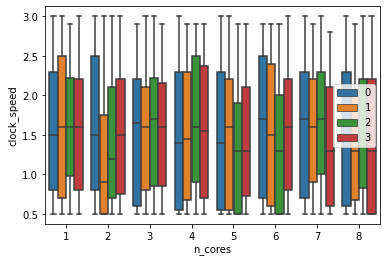

In [16]:
sn.boxplot(x = 'n_cores',y = 'clock_speed',hue = 'price_range',data = mobile)
plt.legend()
plt.show()

#### Results 
The number of core and clock speed does not have much correlation with the price range, i.e there are phone with highest price range but low closs speed and minimum number of cores.

### CONCLUSION

After doing data exploration process we have now get to understand our data features well and how they are correlated with each others. Therefore we will continue with our research work in the next step of doing data preprosseing that will available in notebook named "data_preprocessing"
 